In [1]:
import os
import re
import pandas as pd
import numpy as np

# Plotly
import matplotlib.pyplot as plt

# Images tools
import io
from PIL import Image
import base64

# ML tools
from sklearn.preprocessing import MinMaxScaler

In [2]:
###############
## FUNCIONES ##
###############

# Función para limpiar y reemplazar comillas
def limpiar_y_reemplazar_comillas(texto):
    resultado = re.findall(r'\"(.*?)\"', texto)
    return resultado[0]

# Función para ajustar la escala de 0 a 1 a la escala de -1 a 1
def ajustar_escala(valor):
    return (2 * valor) - 1  

# Función para calcular las proporciones de los primeros 8 elementos
def calcular_proporciones(clasificacion, total_imagenes):
    return sum(clasificacion[:8]) / total_imagenes

# Función para calcular la distancia euclidiana entre dos matrices 3x3
def calcular_distancia_euclidiana(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))


In [3]:
os.chdir('C:/Users/alber/OneDrive/Desktop/MatCAD/4t Curso/TFG')

In [4]:
num_epochs = 500

In [5]:
all_weights_first_layer = pd.read_csv(f'modelos_entrenados_{num_epochs}_epoch/weights_first_layer_epoch_{num_epochs}.csv', header=None)

all_weights_first_layer_mod = all_weights_first_layer.copy()

# Crear imagenes de los filtros
imagenes_filtros = []
tamaño_final = (60, 60)  # Nuevo tamaño de la imagen
for index in range(len(all_weights_first_layer_mod)):
    with io.BytesIO() as output:
        data = all_weights_first_layer.iloc[index].to_numpy().reshape(3, 3)
        data = ((data + 1) / 2 * 255).astype(np.uint8)
        img = Image.fromarray(data, "L")  # Las imágenes MNIST ya son en escala de grises
        
        # Ampliar la imagen al tamaño deseado con NEAREST que es el método de interpolación recomendado para ampliar píxeles
        img_ampliada = img.resize(tamaño_final, Image.NEAREST)
        img_ampliada.save(output, "PNG")
        contents = output.getvalue()
        img_encoded = base64.b64encode(contents)
        img_tag = """<img src="data:image/png;base64,{}">""".format(img_encoded.decode("utf-8"))
        imagenes_filtros.append(img_tag)

# Creando una nueva columna en df_densos y asignándole los valores de imagenes_filtros
all_weights_first_layer_mod['Imagenes'] = imagenes_filtros

# Aplicar la función de limpieza
all_weights_first_layer_mod['Imagenes_new'] = all_weights_first_layer_mod['Imagenes'].apply(limpiar_y_reemplazar_comillas)

## Todos los filtros capa 1

In [6]:
weights_max = all_weights_first_layer.values.flatten().max()
weights_min = all_weights_first_layer.values.flatten().min()
weights_mean = all_weights_first_layer.values.flatten().mean()
weights_std = all_weights_first_layer.values.flatten().std()

print("max: ",weights_max)
print("min: ",weights_min)
print("mean: ",weights_mean)
print("std: ",weights_std)

max:  0.81825393
min:  -1.4619462
mean:  -0.024777144778211458
std:  0.3023908832215896


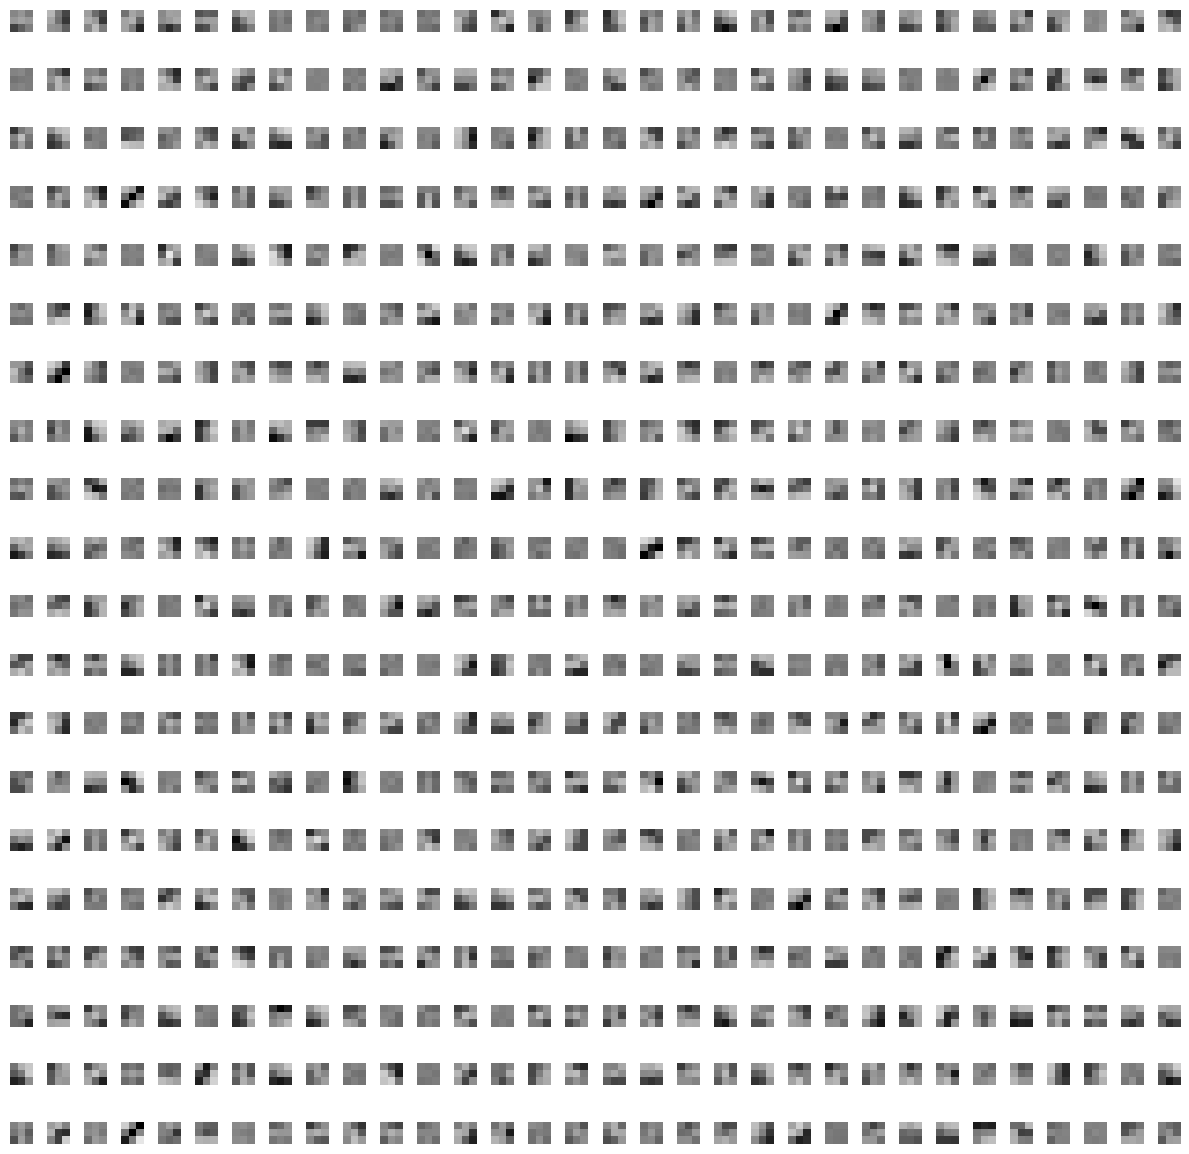

In [7]:
# Mostrar los filtros de la capa 1
fig, axes = plt.subplots(20, 32, figsize=(12, 12))
axes_flat = axes.flatten()
all_weights_first_layer_numpy = all_weights_first_layer.to_numpy()

for i, filtro in enumerate(all_weights_first_layer_numpy):
    # Redimensionando cada filtro a 3x3 para poder visualizarlo como una imagen
    filtro_imagen = filtro.reshape((3, 3))
    ax = axes_flat[i]
    ax.imshow(filtro_imagen, cmap='gray', vmin=-1, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# DEFINICIÓN DE LOS FILTROS PRINCIPALES

filtro_p0 = np.array([0, 0.5, 1,
                      0, 0.5, 1,
                      0, 0.5, 1]).reshape((3, 3))

filtro_p1 = np.array([0.5,   0.75,  1,
                      0.25,  0.5,   0.75,
                      0,     0.25,  0.5]).reshape((3, 3))

filtro_p2 = np.array([1,    1,    1,
                      0.5,  0.5,  0.5,
                      0,    0,    0]).reshape((3, 3))

filtro_p3 = np.array([1,    0.75,  0.5,
                      0.75, 0.5,   0.25,
                      0.5,  0.25,  0]).reshape((3, 3))

filtro_p4 = np.array([1, 0.5, 0,
                      1, 0.5, 0,
                      1, 0.5, 0]).reshape((3, 3))

filtro_p5 = np.array([0.5,  0.25,  0,
                      0.75, 0.5,   0.25,
                      1,    0.75,  0.5]).reshape((3, 3))

filtro_p6 = np.array([0,   0,   0,
                      0.5, 0.5, 0.5,
                      1,   1,   1]).reshape((3, 3))

filtro_p7 = np.array([0,    0.25,  0.5,
                      0.25, 0.5,   0.75,
                      0.5,  0.75,  1]).reshape((3, 3))

## FILTROS RANDOM

filtro_oliva = np.array([0.64, 0.14,  0.61,
                         0.21, 0.42,  0.22,
                         0.39, 0.80,  0.52]).reshape((3, 3))

filtro_jowy = np.array([0.89,  0.34,  0.46,
                        0.31,  0.98,  0.55,
                        0.48,  0.41,  0.52]).reshape((3, 3))

filtro_cris = np.array([0.60,  0.90,  0.30,
                        0.90,  0.69,  0.70,
                        0.46,  0.70,  0.59]).reshape((3, 3))

filtro_esteban = np.array([0.40, 0.22, 0.74,
                           0.47, 0.49, 0.37,
                           0.87, 0.16, 0.49]).reshape((3, 3))

In [9]:
filtros_primary_01 = np.stack([filtro_p0, filtro_p1, filtro_p2, filtro_p3, filtro_p4, filtro_p5, filtro_p6, filtro_p7, filtro_oliva, filtro_jowy, filtro_cris, filtro_esteban])

# Ajustar la escala de los filtros de 0 a 1 a -1 a 1
filtros_primary = ajustar_escala(filtros_primary_01)

# Aplanando los filtros para el cálculo de distancias
filtros_primary = filtros_primary.reshape(12, 9)  

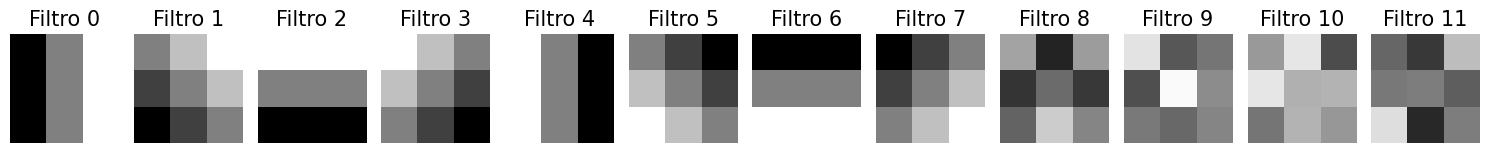

In [10]:
# Visualizando los filtros de media por tipo
fig, axes = plt.subplots(1, len(filtros_primary), figsize=(15, 3))

for i, filtro_media in enumerate(filtros_primary):
    filtro_imagen = filtro_media.reshape((3, 3))
    img = Image.fromarray(filtro_imagen, "L")  # Las imágenes MNIST ya son en escala de grises
    axes[i].imshow(filtro_imagen, cmap='gray', vmin=-1, vmax=1)
    axes[i].set_title(f'Filtro {i}', size=15)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
filtros_reales_flat = filtros_primary.reshape(len(filtros_primary), 3, 3)
all_weights_reshaped = all_weights_first_layer_numpy.reshape(len(all_weights_first_layer_numpy), 3, 3)

# Matriz para almacenar las distancias
distancias = np.zeros((len(all_weights_first_layer_numpy), len(filtros_reales_flat)))

# Calculando la distancia euclidiana para cada combinación de filtro y filtro real
for i, filtro in enumerate(all_weights_reshaped):
    for j, filtro_real in enumerate(filtros_reales_flat):
        distancias[i, j] = calcular_distancia_euclidiana(filtro, filtro_real)

#Darle más peso a los filtros verdaderos
distancias[:, -4:] += 0

# Identificando el filtro real más cercano para cada filtro
indices_filtro_real_mas_correlacionado = np.argmin(distancias, axis=1)

# Contando cuántos filtros se clasificaron como similares a cada filtro real según la distancia
clasificacion_filtros_correlacion = np.bincount(indices_filtro_real_mas_correlacionado, minlength=len(filtros_primary))

print(clasificacion_filtros_correlacion)

[  3  76   2  64   2  56   0  43 149  60  56 129]


In [12]:
# Total de imágenes
total_imagenes = len(all_weights_first_layer_numpy)

# Calculando las proporciones
proporciones = calcular_proporciones(clasificacion_filtros_correlacion, total_imagenes)
print("Proporciones:", proporciones)

Proporciones: 0.384375


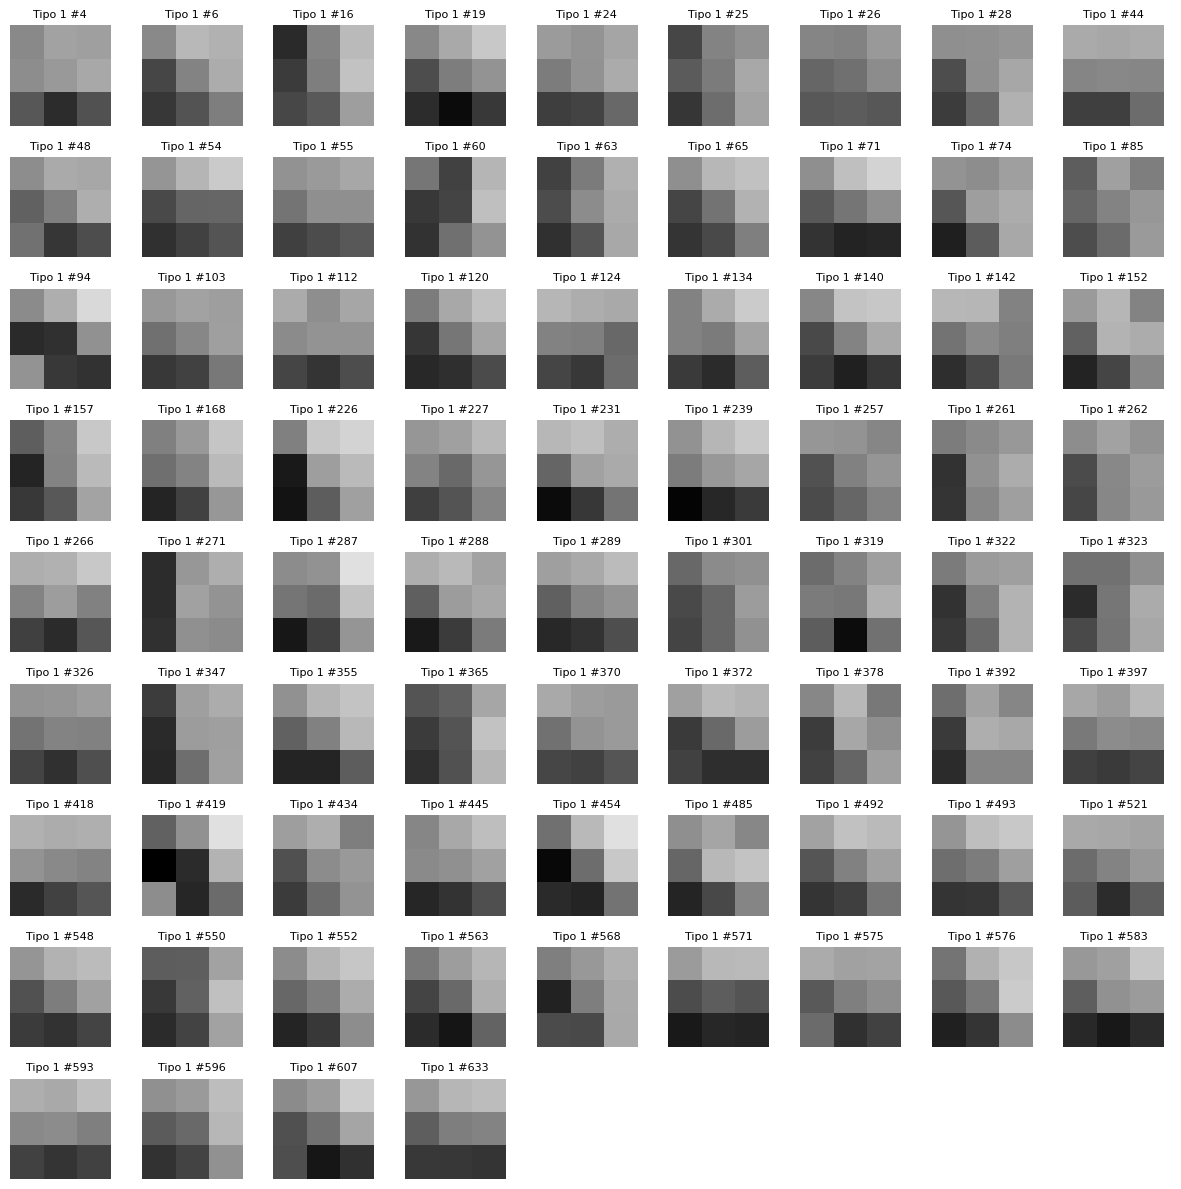

In [13]:
# Filtrando los filtros clasificados como tipo 1 (filtro_p1)
filtros_tipo_1_indices = np.where(indices_filtro_real_mas_correlacionado == 1)[0]
filtros_tipo_1 = all_weights_first_layer_numpy[filtros_tipo_1_indices]

# Calculando cuántos filtros tipo 1 mostrar
n_mostrar = min(len(filtros_tipo_1), 100)
filtros_mostrar = filtros_tipo_1[:n_mostrar]

# Preparando la cuadrícula de visualización
lado_cuadrado = int(np.ceil(np.sqrt(n_mostrar)))
fig, axes = plt.subplots(lado_cuadrado, lado_cuadrado, figsize=(12, 12))
axes_flat = axes.flatten()

# Visualizando cada filtro tipo 1
for i, filtro in enumerate(filtros_mostrar):
    filtro_imagen = filtro.reshape((3, 3))
    
    axes_flat[i].imshow(filtro_imagen, cmap='gray', vmin=-1, vmax=1)
    axes_flat[i].set_title(f'Tipo 1 #{filtros_tipo_1_indices[i]}', fontsize=8)
    axes_flat[i].axis('off')

for ax in axes_flat[n_mostrar:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\alber\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alber\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


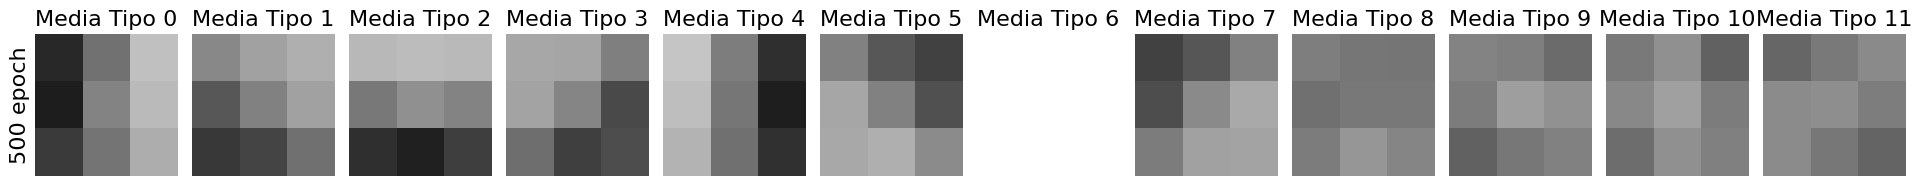

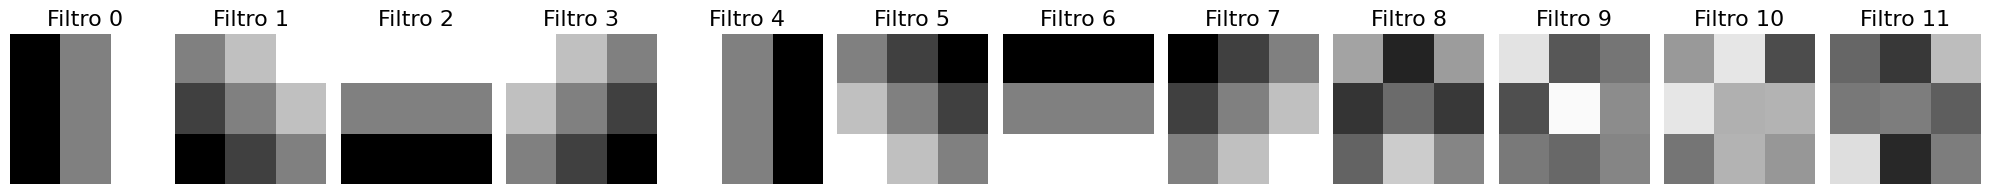

In [14]:
filtros_media_por_tipo = []

for i in range(len(filtros_primary)):
    # Obteniendo los índices de los filtros clasificados como tipo i
    indices_filtrados = np.where(indices_filtro_real_mas_correlacionado == i)[0]
    # Obteniendo los filtros clasificados como tipo i
    filtros_tipo_i = all_weights_first_layer_numpy[indices_filtrados]
    # Calculando la media de los filtros tipo i
    filtro_media_tipo_i = np.mean(filtros_tipo_i, axis=0)
    filtros_media_por_tipo.append(filtro_media_tipo_i)

# Visualizando los filtros de media por tipo
fig, axes = plt.subplots(1, len(filtros_primary), figsize=(20, 3))

for i, filtro_media in enumerate(filtros_media_por_tipo):
    filtro_imagen = filtro_media.reshape((3, 3))
    img = Image.fromarray(filtro_imagen, "L")

    axes[i].imshow(filtro_imagen, cmap='gray', vmin=-1, vmax=1)
    axes[i].set_title(f'Media Tipo {i}', size=16)
    axes[i].axis('off')

# Añadir el título del eje Y rotado
fig.text(0.05, 0.5, f'{num_epochs} epoch', va='center', ha='center', rotation='vertical', fontsize=16)

plt.tight_layout(rect=[0.05, 0, 1, 1])  # Ajustar para dejar espacio al título del eje Y
plt.show()

# Visualizando los filtros de media por tipo
fig, axes = plt.subplots(1, len(filtros_primary), figsize=(20, 3))

for i, filtro_media in enumerate(filtros_primary):
    filtro_imagen = filtro_media.reshape((3, 3))
    img = Image.fromarray(filtro_imagen, "L")

    axes[i].imshow(filtro_imagen, cmap='gray', vmin=-1, vmax=1)
    axes[i].set_title(f'Filtro {i}', size=16)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
